Importamos 

In [193]:
import pandas as pd
import ast
import numpy as np

from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns

Abrimos el archivo Json(Output) y visualizamos su contenido

In [194]:
df_output = pd.read_json(r"D:\escritorio\Proyecto\output_steam_games.json", lines=True)
df_output


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"


Guardamos en un formato CSV y luego procedemos a abrirlo

In [195]:
df_output.to_csv("df_output.csv", index=False, encoding='utf-8')

In [196]:
df_output = pd.read_csv("df_output.csv")
print(df_output.head())

  publisher genres app_name title  url release_date tags reviews_url specs  \
0       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   NaN   
1       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   NaN   
2       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   NaN   
3       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   NaN   
4       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   NaN   

  price  early_access  id developer  
0   NaN           NaN NaN       NaN  
1   NaN           NaN NaN       NaN  
2   NaN           NaN NaN       NaN  
3   NaN           NaN NaN       NaN  
4   NaN           NaN NaN       NaN  


C:\Users\lautaro\AppData\Local\Temp\ipykernel_17232\3639266675.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_output = pd.read_csv("df_output.csv")


Se revisan los tipos de datos por columna y la cantidad de nulos.

In [197]:
df_output.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24064 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


Vemos si tenemos datos duplicados

In [198]:
duplicados = df_output[df_output.duplicated()]

cantidad_duplicados = len(duplicados)

if cantidad_duplicados == 0:
    print("No se encontraron filas duplicadas.")
else:
    print(f"Se encontraron {cantidad_duplicados} filas duplicadas:")
    print(duplicados)

Se encontraron 88309 filas duplicadas:
      publisher genres app_name title  url release_date tags reviews_url  \
1           NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
2           NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
3           NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
4           NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
5           NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
...         ...    ...      ...   ...  ...          ...  ...         ...   
88305       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
88306       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
88307       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
88308       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   
88309       NaN    NaN      NaN   NaN  NaN          NaN  NaN         NaN   

      specs price  early_access  id developer  


Eliminamos los datos duplicados

In [199]:
# Eliminar filas duplicadas
df_output = df_output.drop_duplicates()


Miramos si tenemos valores nulos

In [200]:
def verificar_tipo_datos(df_output):
    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": []}
    for columna in df_output.columns:
        porcentaje_no_nulos = (df_output[columna].count() / len(df_output)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df_output[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
    df_info = pd.DataFrame(mi_dict)
    for columna in df_output.columns:
        print(columna, " (nulos) = ", df_output[columna].isnull().sum())
    print("\nfilas completamente nulas: ", df_output.isna().all(axis=1).sum())
    return df_info 
df_info = verificar_tipo_datos(df_output)
print(df_info)

publisher  (nulos) =  8072
genres  (nulos) =  3284
app_name  (nulos) =  3
title  (nulos) =  2051
url  (nulos) =  1
release_date  (nulos) =  2068
tags  (nulos) =  164
reviews_url  (nulos) =  3
specs  (nulos) =  671
price  (nulos) =  1378
early_access  (nulos) =  1
id  (nulos) =  3
developer  (nulos) =  3300

filas completamente nulas:  1
    nombre_campo                        tipo_datos  no_nulos_%  nulos_%
0      publisher  [<class 'float'>, <class 'str'>]       74.88    25.12
1         genres  [<class 'float'>, <class 'str'>]       89.78    10.22
2       app_name  [<class 'float'>, <class 'str'>]       99.99     0.01
3          title  [<class 'float'>, <class 'str'>]       93.62     6.38
4            url  [<class 'float'>, <class 'str'>]      100.00     0.00
5   release_date  [<class 'float'>, <class 'str'>]       93.56     6.44
6           tags  [<class 'float'>, <class 'str'>]       99.49     0.51
7    reviews_url  [<class 'float'>, <class 'str'>]       99.99     0.01
8          sp

In [201]:
df_output.dropna(subset=['id'], inplace=True)

In [202]:
# Convertir la columna "id" de float a int
df_output["id"] = df_output["id"].astype(int)

# Convertir la columna "id" de int a str
df_output["id"] = df_output["id"].astype(str)

In [203]:
columns_to_fill = ["genres", "app_name", "tags", "specs", "developer", "price"]

df_output[columns_to_fill] = df_output[columns_to_fill].fillna("sin_dato")

In [221]:
df_output.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,early_access,id,developer,price,release_year
88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],0.0,761140,Kotoshiro,4.99,2018


In [205]:
df_output["price_num"] = pd.to_numeric(df_output["price"], errors='coerce')
df_output["price_num"] = pd.to_numeric(df_output["price_num"], errors='coerce')
df_output["price_num"] = df_output["price_num"].fillna(0)

In [206]:
df_output["price_num"] = df_output["price_num"].round(2)

In [207]:
df_output.drop(columns=["price"], inplace=True)

In [208]:
df_output.rename(columns={"price_num": "price"}, inplace=True)

In [223]:
df_output.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,early_access,id,developer,price,release_year
88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],0.0,761140,Kotoshiro,4.99,2018


Cambiamos el formato de la fecha y solo dejamos el año 

In [210]:
# Asegúrate de que la columna 'posted' sea de tipo string
df_output['release_date'] = df_output['release_date'].astype(str)

# Elimina espacios adicionales al principio y al final de cada fecha
df_output['release_date'] = df_output['release_date'].str.strip()

# Intenta convertir las fechas al formato datetime, manejando los errores como valores nulos
df_output['release_date'] = pd.to_datetime(df_output['release_date'], errors='coerce')

# Filtra las filas con fechas no nulas
df_output = df_output.dropna(subset=['release_date'])

# Luego, convierte las fechas al formato deseado (año/mes/día) como cadenas de texto
df_output['release_date'] = df_output['release_date'].dt.strftime('%Y/%m/%d')

C:\Users\lautaro\AppData\Local\Temp\ipykernel_17232\1745975562.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['release_date'] = df_output['release_date'].dt.strftime('%Y/%m/%d')


In [211]:
df_output.info()


<class 'pandas.core.frame.DataFrame'>
Index: 29782 entries, 88310 to 120443
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     23773 non-null  object 
 1   genres        29782 non-null  object 
 2   app_name      29782 non-null  object 
 3   title         29781 non-null  object 
 4   url           29782 non-null  object 
 5   release_date  29782 non-null  object 
 6   tags          29782 non-null  object 
 7   reviews_url   29782 non-null  object 
 8   specs         29782 non-null  object 
 9   early_access  29782 non-null  float64
 10  id            29782 non-null  object 
 11  developer     29782 non-null  object 
 12  price         29782 non-null  float64
dtypes: float64(2), object(11)
memory usage: 3.2+ MB


In [212]:
# Convertir la columna 'release_date' a datetime
df_output['release_date'] = pd.to_datetime(df_output['release_date'])

# Crear una nueva columna 'release_year' y extraer el año de 'release_date'
df_output['release_year'] = df_output['release_date'].dt.year

C:\Users\lautaro\AppData\Local\Temp\ipykernel_17232\786449215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['release_date'] = pd.to_datetime(df_output['release_date'])
C:\Users\lautaro\AppData\Local\Temp\ipykernel_17232\786449215.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['release_year'] = df_output['release_date'].dt.year


In [213]:
df_output.info(1)

<class 'pandas.core.frame.DataFrame'>
Index: 29782 entries, 88310 to 120443
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publisher     23773 non-null  object        
 1   genres        29782 non-null  object        
 2   app_name      29782 non-null  object        
 3   title         29781 non-null  object        
 4   url           29782 non-null  object        
 5   release_date  29782 non-null  datetime64[ns]
 6   tags          29782 non-null  object        
 7   reviews_url   29782 non-null  object        
 8   specs         29782 non-null  object        
 9   early_access  29782 non-null  float64       
 10  id            29782 non-null  object        
 11  developer     29782 non-null  object        
 12  price         29782 non-null  float64       
 13  release_year  29782 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(10)
memory usage: 3.3+ MB


In [214]:
# Crear una nueva columna 'release_year' y extraer el año de 'release_date'
df_output['release_year'] = pd.to_datetime(df_output['release_date']).dt.year


C:\Users\lautaro\AppData\Local\Temp\ipykernel_17232\3572864513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['release_year'] = pd.to_datetime(df_output['release_date']).dt.year


In [224]:
df_output.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,early_access,id,developer,price,release_year
88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],0.0,761140,Kotoshiro,4.99,2018


In [225]:
df_output["release_year"].sort_values(ascending=False)

101450    2021
102531    2019
109678    2019
102742    2019
120366    2018
          ... 
97556     1981
107428    1980
103155    1975
107412    1970
103157    1970
Name: release_year, Length: 29782, dtype: object

CREAMOS UN HISTOGRAMAS

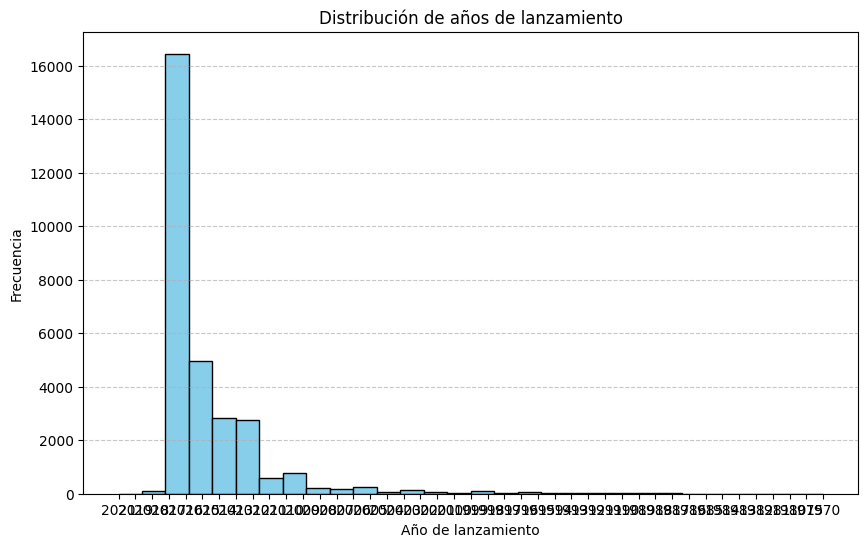

In [226]:
import matplotlib.pyplot as plt

# Ordena los valores de release_year en orden descendente
sorted_release_years = df_output["release_year"].sort_values(ascending=False)

# Crea un histograma
plt.figure(figsize=(10, 6))
plt.hist(sorted_release_years, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de años de lanzamiento')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [219]:
df_output

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,early_access,id,developer,price,release_year
88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],0.0,761140,Kotoshiro,4.99,2018
88311,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.0,643980,Secret Level SRL,0.00,2018
88312,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.0,670290,Poolians.com,0.00,2017
88313,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.0,767400,彼岸领域,0.99,2017
88315,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"['Action', 'Adventure', 'Simulation', 'FPS', '...",http://steamcommunity.com/app/772540/reviews/?...,"['Single-player', 'Steam Achievements']",0.0,772540,Trickjump Games Ltd,3.99,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120439,Bidoniera Games,"['Action', 'Adventure', 'Casual', 'Indie']",Kebab it Up!,Kebab it Up!,http://store.steampowered.com/app/745400/Kebab...,2018-01-04,"['Action', 'Indie', 'Casual', 'Violent', 'Adve...",http://steamcommunity.com/app/745400/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",0.0,745400,Bidoniera Games,1.99,2018
120440,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",http://steamcommunity.com/app/773640/reviews/?...,"['Single-player', 'Steam Achievements']",0.0,773640,"Nikita ""Ghost_RUS""",1.99,2018
120441,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"['Strategy', 'Indie', 'Casual']",http://steamcommunity.com/app/733530/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",0.0,733530,Sacada,4.99,2018
120442,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",0.0,610660,Laush Dmitriy Sergeevich,1.99,2018


In [230]:
import pandas as pd
import ast

# Llenar los valores NaN en la columna 'genres' con una lista vacía
df_output['genres'].fillna('[]', inplace=True)

# Crear una lista para almacenar las filas desanidadas
new_rows = []

# Iterar a través del DataFrame original
for index, row in df_output.iterrows():
    try:
        genres_list = ast.literal_eval(row['genres'])
        if not isinstance(genres_list, list):
            genres_list = []
        for genre in genres_list:
            new_row = row.copy()
            new_row['genres'] = genre
            new_rows.append(new_row)
    except (SyntaxError, ValueError):
        # Handle the case where the 'genres' column contains invalid data
        pass

# Crear un nuevo DataFrame con las filas desanidadas
new_df = pd.DataFrame(new_rows)

# Ahora new_df contiene las filas desanidadas con 'genres' como columnas individuales

C:\Users\lautaro\AppData\Local\Temp\ipykernel_17232\2519238236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['genres'].fillna('[]', inplace=True)


In [231]:
new_df.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,early_access,id,developer,price,release_year
88310,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],0.0,761140,Kotoshiro,4.99,2018


Eliminamos columnas que no vamos a utilizar

In [232]:

# Lista de columnas a eliminar
columnas_a_eliminar = ['publisher', 'app_name', 'title', 'tags', 'specs', 'early_access','url']

# Eliminar varias columnas a la vez
new_df = new_df.drop(columnas_a_eliminar, axis=1)



In [233]:
# Cambiar el nombre de la columna
new_df.rename(columns={'id': 'item_id'}, inplace=True)

In [234]:
new_df.head(1)

,genres,release_date,reviews_url,item_id,developer,price,release_year
88310,Action,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,761140,Kotoshiro,4.99,2018


Guardamos en un CSV el archivo trabajado

In [ ]:
new_df.to_csv('output_desanidado.csv', index=False)